# EOSC 582 Petty Problem 5.5

In [1]:
__author__ = 'Yingkai (Kyle) Sha'
__email__  = 'yingkai@eos.ubc.ca'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Selection of satellite channels 

By refering to Fig 5.2 on Petty's book p100:

<img src="figures/Petty_Fig_5.2.png" width=550 align="left"/>

We found following characters for natural Land Cover Type (LCT): 

* Lake behaves like a black body.
* Fresh Snow has the highest reflectivity for Visable Band and Near Infrard Band.
* Wet Snow and Fresh Snow have the same trend but different magnititude for reflectivity change with wavelength
* the reflectivities for vegetations (grass and alfalfa) have a rapid increase from Visable Band (0.4 - 0.7 $\mu m$) to Near Infrard Band (0.8 - 1.1 $\mu m$) which is unique for all natural surface types.

Based on these, I define the central wavelength of 2 satellite bands as:

$\lambda_1 = 0.6 \mu m$

$\lambda_2 = 1.1 \mu m$

That leads to a set of values for $r_1$ and $r_2$ : 

In [3]:
lct = ['Straw', 'Grass', 'Alfalfa', 'Lake', 'Wet Snow', 'Fresh Snow', 'Dark Soil', 'Light Soil']
r1  = [  0.20 ,  0.11  ,   0.08   ,  0.09 ,   0.70    ,    0.94     ,   0.06     ,    0.30     ]
r2  = [  0.40 ,  0.48  ,   0.30   ,  0.03 ,   0.50    ,    0.85     ,   0.16     ,    0.48     ]

# Algorithms

## Step 1 - Fresh Snow, Wet Snow

plot reflectivities on a $r_1$ and $r_2$ 2-D frame:

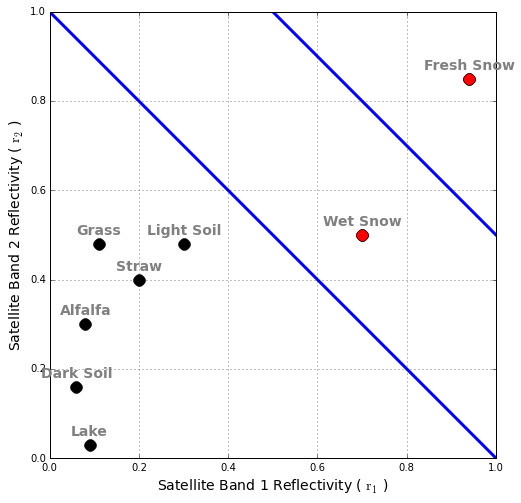

In [4]:
fig=plt.figure(figsize=(8, 8))
ax=plt.gca()
ax.plot(r1, r2, 'ko', markersize=12)
ax.plot([r1[4], r1[5]], [r2[4], r2[5]], 'ro', markersize=12)
ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20)*-1+1.5, 'b-', linewidth=3.0)
ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20)*-1+1, 'b-', linewidth=3.0)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('Satellite Band 1 Reflectivity ( $\mathrm{r_1}$ )', fontsize=14)
ax.set_ylabel('Satellite Band 2 Reflectivity ( $\mathrm{r_2}$ )', fontsize=14)
ax.grid()
for i in range(len(lct)):
    ax.annotate(lct[i], xy=(r1[i], r2[i]+0.03), color='gray', \
                                                fontsize=14, \
                                                fontweight='bold', \
                                                horizontalalignment='center', \
                                                verticalalignment='center') # xycoords='axes fraction'

On a $r_1$ and $r_2$ frame, we can distinguish **Fresh Snow** (high $r_1$, high $r_2$), **Wet Snow** (high $r_1$, low $r_2$) from other LCT end members (very low $r_1$).

Decision Line:

$r_2 > r_1 \times -1 + 1.5$ for **Fresh Snow**

$(r_1 \times -1 + 1.0) < r_2 < (r_1 \times -1 + 1.5)$ for **Wet Snow**

## Step 2 - Vegetation, Lake

Plot reflectivities on a $r_2$ and $r_2/r_1^{0.8}$ frame.

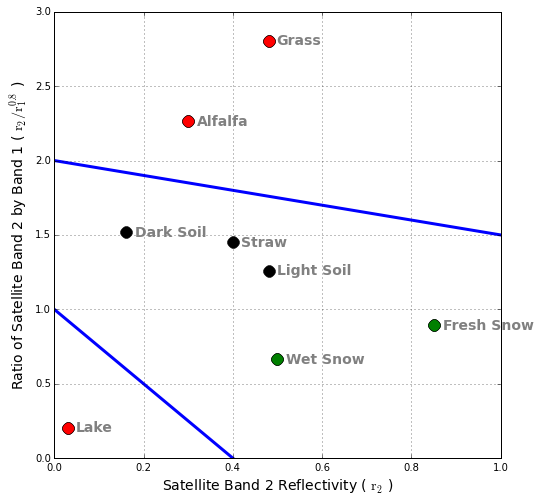

In [5]:
x1 = np.array(r2) 
x2 = np.array(r2)/(np.array(r1)**0.8)
fig=plt.figure(figsize=(8, 8))
ax=plt.gca()
ax.plot(x1, x2, 'ko', markersize=12)
ax.plot(x1[1:4], x2[1:4], 'ro', markersize=12)
ax.plot([x1[4], x1[5]], [x2[4], x2[5]], 'go', markersize=12)
ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20)*-0.5+2, 'b-', linewidth=3.0)
ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20)*-2.5+1, 'b-', linewidth=3.0)
ax.set_xlim(0, 1)
ax.set_ylim(0, 3)
ax.set_xlabel('Satellite Band 2 Reflectivity ( $\mathrm{r_2}$ )', fontsize=14)
ax.set_ylabel('Ratio of Satellite Band 2 by Band 1 ( $\mathrm{r_2/r_1^{0.8}}$ )', fontsize=14)
ax.grid()
for i in range(len(lct)):
    ax.annotate(lct[i], xy=(x1[i]+0.02, x2[i]), color='gray', \
                                                fontsize=14, \
                                                fontweight='bold', \
                                                verticalalignment='center') # xycoords='axes fraction'

On a $r_2$ and $r_2/r_1^{0.8}$ frame, **Grass + Alfalfa** (high ratio, mid $r_2$) as vegetations and **Lake** (low ratio, low $r_2$) can be distinguished from other LCT end-members. 

Decision Line:

$ r_2/r_1^{0.8} > r_2 \times -0.5 + 2$ for **Grass + Alfalfa**

$ r_2/r_1^{0.8} < r_2 \times -2.5 + 1$ for **Lake**

## Step 3 - Dark Soil

Plot reflectivities on a $r_2$ and $r_2/r_1^{2}$ frame.

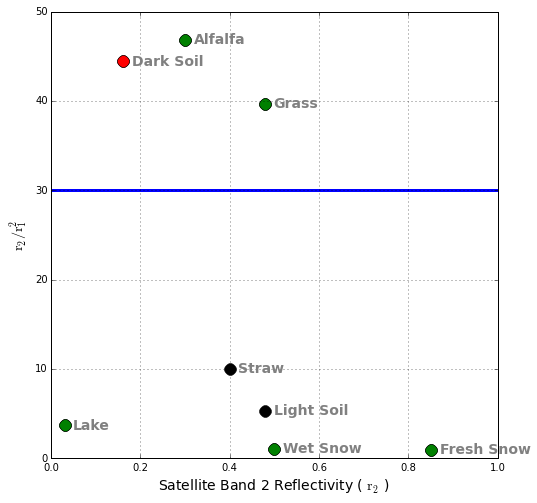

In [6]:
x1 = np.array(r2) 
x2 = (np.array(r2))/(np.array(r1)**2)
fig=plt.figure(figsize=(8, 8))
ax=plt.gca()
ax.plot(x1, x2, 'ko', markersize=12)
ax.plot(x1[1:6], x2[1:6], 'go', markersize=12)
ax.plot(x1[6], x2[6], 'ro', markersize=12)
ax.plot(np.linspace(0, 1, 20), 30*np.ones(20), 'b-', linewidth=3.0)
ax.set_xlim(0, 1)
ax.set_ylim(0, 50)
ax.set_xlabel('Satellite Band 2 Reflectivity ( $\mathrm{r_2}$ )', fontsize=14)
ax.set_ylabel('$\mathrm{r_2/r_1^2}$', fontsize=14)
ax.grid()
for i in range(len(lct)):
    ax.annotate(lct[i], xy=(x1[i]+0.02, x2[i]), color='gray', \
                                                fontsize=14, \
                                                fontweight='bold', \
                                                verticalalignment='center') # xycoords='axes fraction'

Since we already get Grass and Alfalfa fraction with confidence, then on a $r_2$ and $r_2/r_1^{2}$ frame, we can distinguish **Dark Soil** (high ratio).

Decision Line

$r_2/r_1^{2} > 30$ except identified vegetations grid for **Dark Soil**

## Step 4 - Alfalfa from Grass

Plot reflectivities on a $r_2$ and $r_2/r_1^{0.2}$ frame.

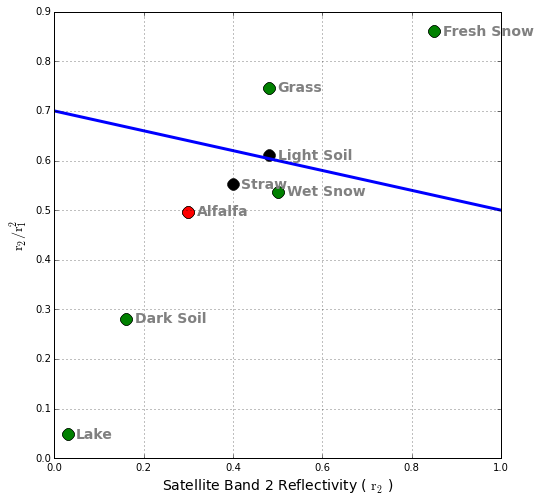

In [9]:
x1 = np.array(r2) 
x2 = (np.array(r2))/(np.array(r1)**0.2)
fig=plt.figure(figsize=(8, 8))
ax=plt.gca()
ax.plot(x1, x2, 'ko', markersize=12)
ax.plot(x1[1:7], x2[1:7], 'go', markersize=12)
ax.plot(x1[2], x2[2], 'ro', markersize=12)
ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20)*-0.2+0.7, 'b-', linewidth=3.0)
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.9)
ax.set_xlabel('Satellite Band 2 Reflectivity ( $\mathrm{r_2}$ )', fontsize=14)
ax.set_ylabel('$\mathrm{r_2/r_1^2}$', fontsize=14)
ax.grid()
for i in range(len(lct)):
    ax.annotate(lct[i], xy=(x1[i]+0.02, x2[i]), color='gray', \
                                                fontsize=14, \
                                                fontweight='bold', \
                                                verticalalignment='center') # xycoords='axes fraction'

$r_2$ and $r_2/r_1^{0.2}$ frame distinguish **Alfalfa** from **Grass**.

Decision Line

$r_2/r_1^{0.2} < r_2 \times -0.2 + 0.7 $ in Alfalfa+Grass for **Alfalfa alone**.

# Summary

* Step1: $r_1$, $r_2$ plot $\longrightarrow$ Fresh Snow, Wet Snow.

* Step2: $r_2$, $r_2/r_1^{0.8}$ plot $\longrightarrow$ Grass and Alfalfa together as vegetation, Lake.

* Step3: $r_2$, $r_2/r_1^{2}$ plot $\longrightarrow$ Dark Soil.

* Step4: $r_2/r_1^{0.2}$ plot $\longrightarrow$ Alfalfa from Grass.

Straw and Light Soil looks similar on both $r_1$ and $r_2$, 2 bands alone is not able to distinguish the pair.